In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from typing import Dict, Any
import logging
from molencoder.evaluation.statistical_evaluation import repeated_measures_anova, tukey_hsd
from molencoder.utils.experiment_plotting import analyze_and_plot_five_experiments

Significant differences found for rho with p-value 2.3939629642257047e-101
Saved PNG plot for rho to /Users/fabian/Code/smilesencoder/plots/masking_ratio/regular_smiles/rho_five_datasets_comparison.png
Saved PDF plot for rho to /Users/fabian/Code/smilesencoder/plots/masking_ratio/regular_smiles/rho_five_datasets_comparison.pdf


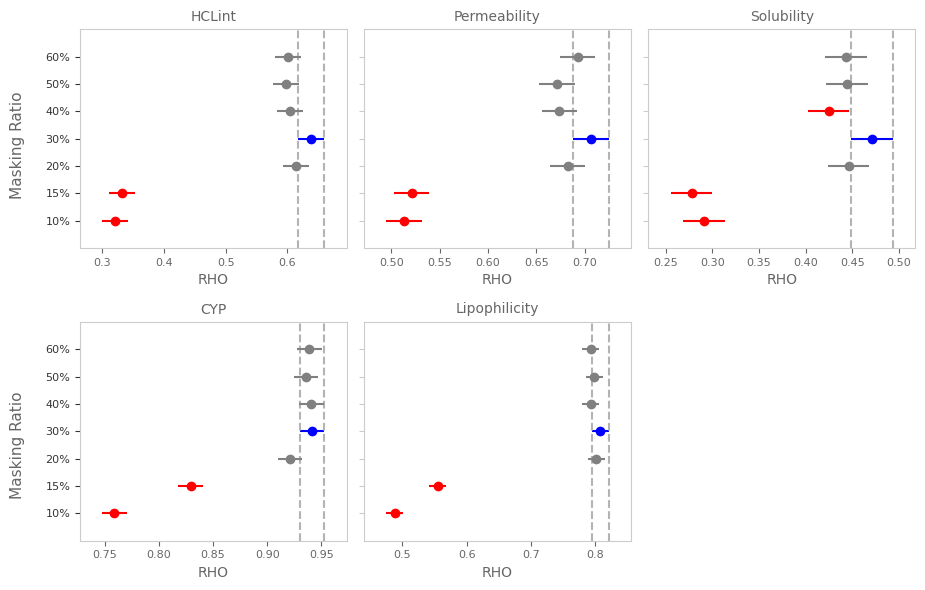

Significant differences found for mse with p-value 5.606846450500679e-102
Saved PNG plot for mse to /Users/fabian/Code/smilesencoder/plots/masking_ratio/regular_smiles/mse_five_datasets_comparison.png
Saved PDF plot for mse to /Users/fabian/Code/smilesencoder/plots/masking_ratio/regular_smiles/mse_five_datasets_comparison.pdf


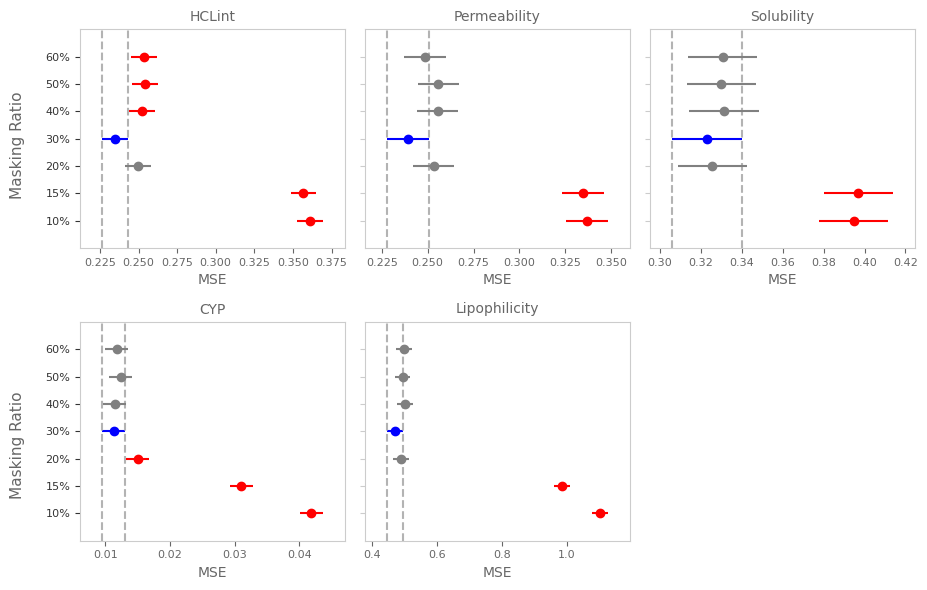

Significant differences found for mae with p-value 9.132393524410828e-109
Saved PNG plot for mae to /Users/fabian/Code/smilesencoder/plots/masking_ratio/regular_smiles/mae_five_datasets_comparison.png
Saved PDF plot for mae to /Users/fabian/Code/smilesencoder/plots/masking_ratio/regular_smiles/mae_five_datasets_comparison.pdf


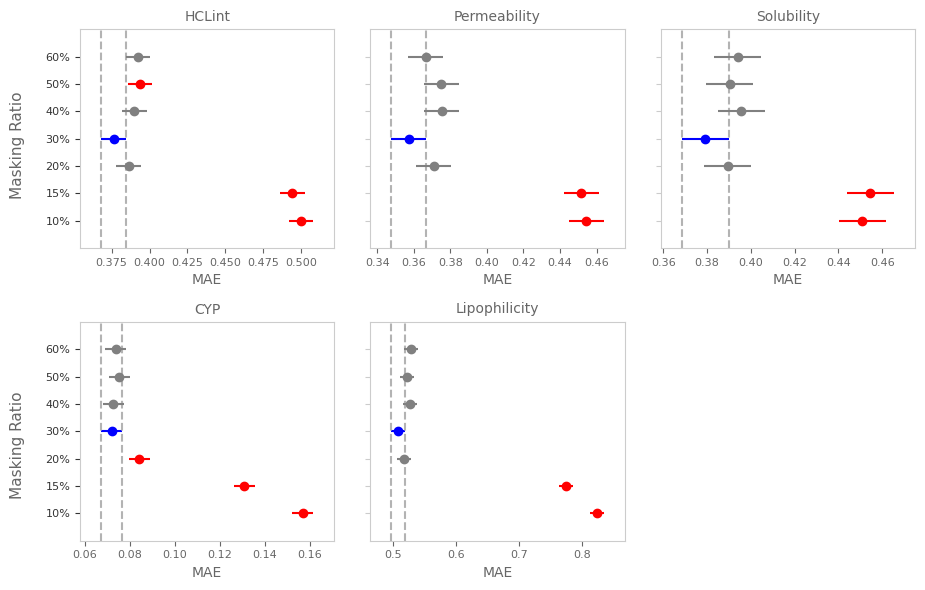

Significant differences found for r2 with p-value 8.911051135980945e-102
Saved PNG plot for r2 to /Users/fabian/Code/smilesencoder/plots/masking_ratio/regular_smiles/r2_five_datasets_comparison.png
Saved PDF plot for r2 to /Users/fabian/Code/smilesencoder/plots/masking_ratio/regular_smiles/r2_five_datasets_comparison.pdf


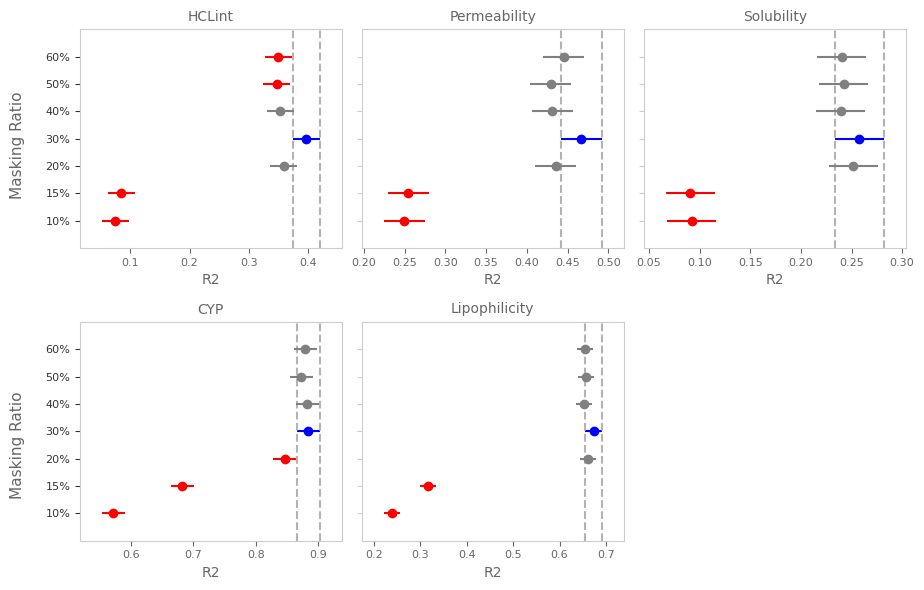

In [2]:
model_name_mapping = {
    'fabikru/model_15M_small_ds_masking_0.1_predicted_hparamas': '10%',
    'fabikru/model_15M_small_ds_masking_0.15_predicted_hparamas': '15%',
    'fabikru/model_15M_small_ds_masking_0.2_predicted_hparamas': '20%',
    'fabikru/model_15M_small_ds_masking_30_predicted_hparams': '30%',
    'fabikru/model_15M_small_ds_masking_0.4_predicted_hparamas': '40%',
    'fabikru/model_15M_small_ds_masking_0.5_predicted_hparamas': '50%',
    'fabikru/model_15M_small_ds_masking_0.6_predicted_hparamas': '60%'
}

csv_paths = [
    "/Users/fabian/Code/smilesencoder/experiments/masking_ratios/adme-fang-HCLint-1_results.csv",
    "/Users/fabian/Code/smilesencoder/experiments/masking_ratios/adme-fang-PERM-1_results.csv",
    "/Users/fabian/Code/smilesencoder/experiments/masking_ratios/adme-fang-SOLU-1_results.csv",
    "/Users/fabian/Code/smilesencoder/experiments/masking_ratios/adme-novartis-cyp3a4-reg_results.csv",
    "/Users/fabian/Code/smilesencoder/experiments/masking_ratios/lipophilicity-astrazeneca_results.csv",
]

output_path = Path("/Users/fabian/Code/smilesencoder/plots/masking_ratio/regular_smiles")

analyze_and_plot_five_experiments(csv_paths=csv_paths, model_name_mapping=model_name_mapping, output_dir=output_path)

In [31]:
model_name_mapping = {
    'fabikru/model_15M_small_ds_masking_0.1_predicted_hparamas': '10%',
    'fabikru/model_15M_small_ds_masking_0.15_predicted_hparamas': '15%',
    'fabikru/model_15M_small_ds_masking_0.2_predicted_hparamas': '20%',
    'fabikru/model_15M_small_ds_masking_30_predicted_hparams': '30%',
    'fabikru/model_15M_small_ds_masking_0.4_predicted_hparamas': '40%',
    'fabikru/model_15M_small_ds_masking_0.5_predicted_hparamas': '50%',
    'fabikru/model_15M_small_ds_masking_0.6_predicted_hparamas': '60%'
}


def load_and_prepare_data(csv_path: str) -> Dict[str, pd.DataFrame]:
    """
    Load the CSV file and prepare data for each metric.
    
    Args:
        csv_path: Path to the CSV file containing evaluation results
        
    Returns:
        Dictionary with metric names as keys and prepared DataFrames as values
    """
    # Load the CSV file
    df = pd.read_csv(csv_path)

    # Map model names to concise versions
    df['model'] = df['model'].map(model_name_mapping)
    
    # Create a dictionary to store prepared data for each metric
    prepared_data = {}
    
    # Get unique metrics
    metrics = df['metric_name'].unique()
    
    for metric in metrics:
        # Filter data for current metric
        metric_data = df[df['metric_name'] == metric]
        
        # Pivot the data to have models as columns and folds as rows
        pivot_data = metric_data.pivot(
            index='fold',
            columns='model',
            values='value'
        )
        
        prepared_data[metric] = pivot_data
    
    return prepared_data


In [32]:
def find_best_model(data: pd.DataFrame, metric_name: str) -> str:
    """
    Find the best performing model based on the metric values.
    For MAE and MSE, lower is better. For R2 and rho, higher is better.
    
    Args:
        data: DataFrame with models as columns and metric values as rows
        metric_name: Name of the metric being evaluated
        
    Returns:
        Name of the best performing model
    """
    # Calculate mean performance for each model
    model_means = data.mean()
    
    if metric_name in ['mae', 'mse']:
        # For MAE and MSE, lower is better
        best_model = model_means.idxmin()
    else:
        # For R2 and rho, higher is better
        best_model = model_means.idxmax()
    
    return best_model

Significant differences found for r2 with p-value 8.426145272611117e-43


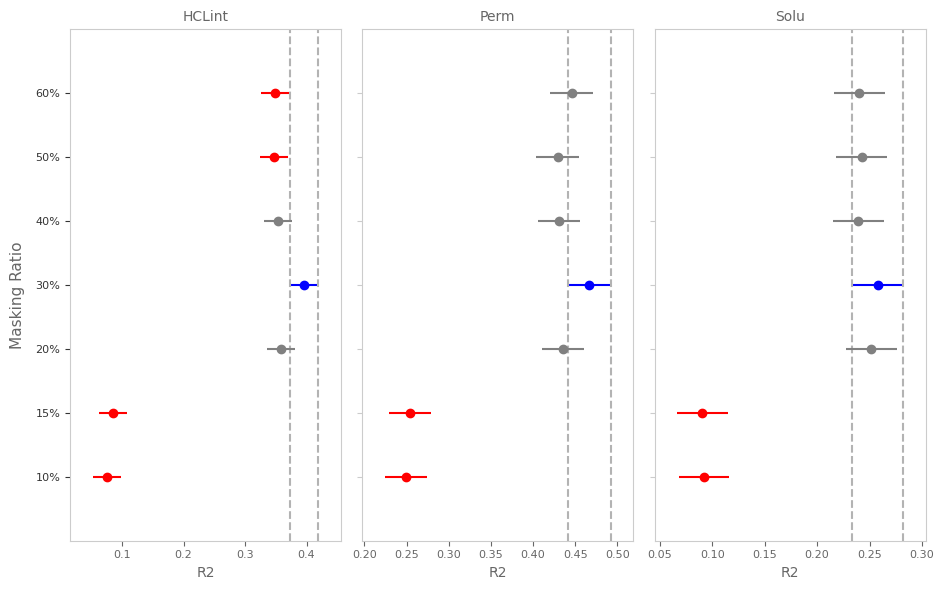

Significant differences found for mse with p-value 3.3805155104574483e-42


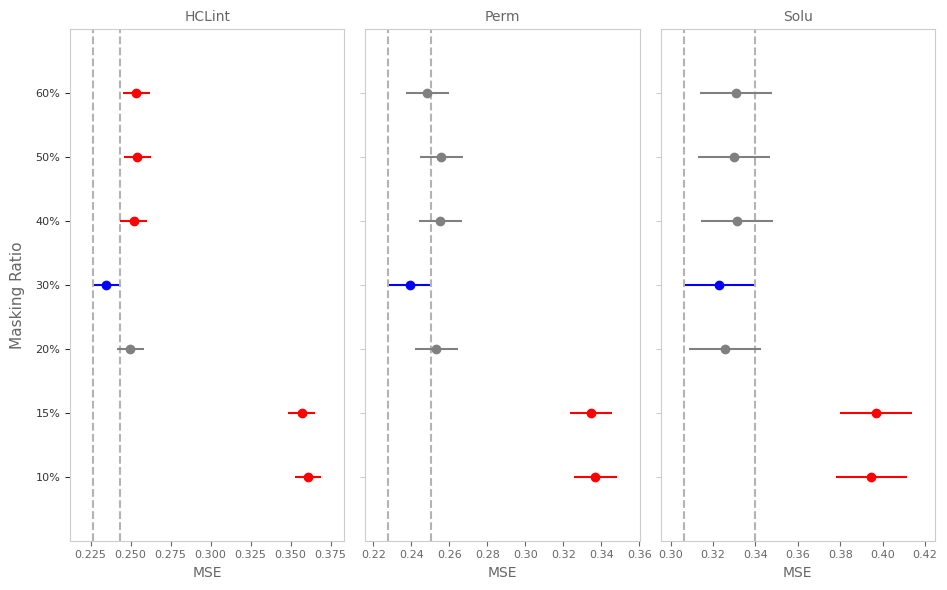

Significant differences found for mae with p-value 5.848127254960092e-44


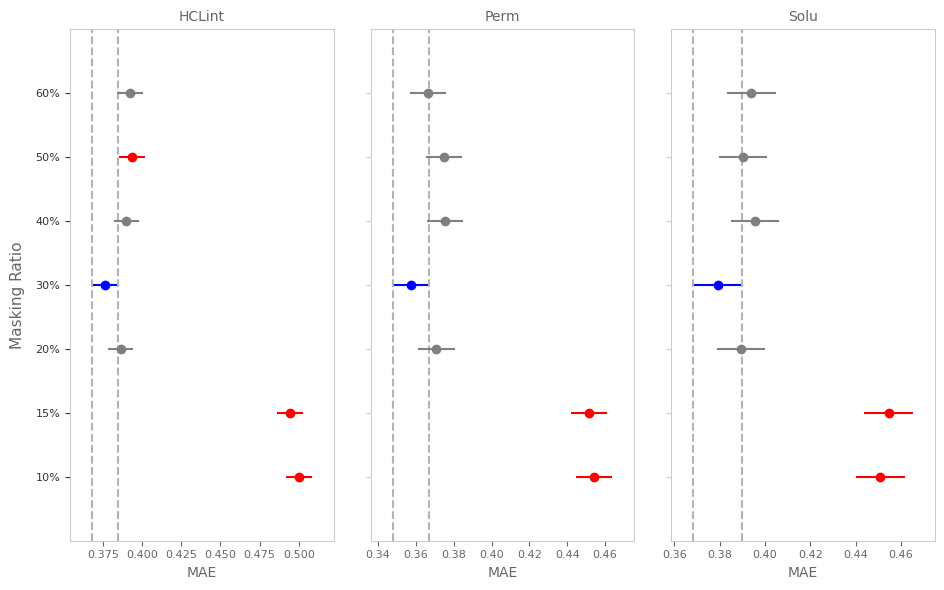

Significant differences found for rho with p-value 2.4132930464357087e-44


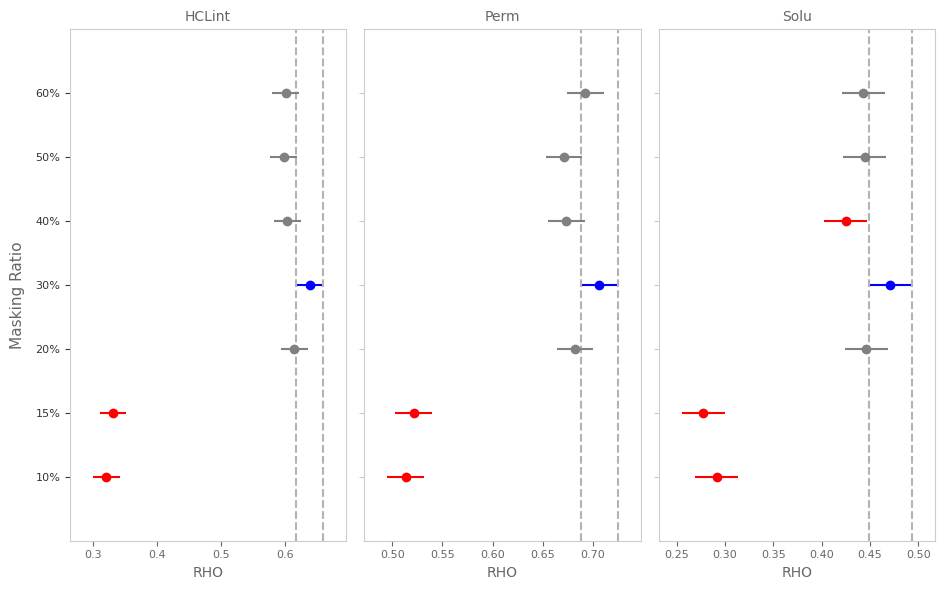

In [33]:
import matplotlib.pyplot as plt

csv_paths = [
    "/Users/fabian/Code/smilesencoder/experiments/masking_ratios/adme-fang-HCLint-1_results.csv",
    "/Users/fabian/Code/smilesencoder/experiments/masking_ratios/adme-fang-PERM-1_results.csv",
    "/Users/fabian/Code/smilesencoder/experiments/masking_ratios/adme-fang-SOLU-1_results.csv"
]

# Collect all data first
all_data = {}
for csv_path in csv_paths:
    dataset_name = csv_path.split('/')[-1].replace('_results.csv', '').replace('adme-fang-', '').replace('-1', '').replace("PERM", "Perm").replace("SOLU", "Solu")
    prepared_data = load_and_prepare_data(csv_path)
    all_data[dataset_name] = prepared_data

# Get all unique metrics
all_metrics = set()
for dataset_data in all_data.values():
    all_metrics.update(dataset_data.keys())

# Create subplots for each metric
for metric in all_metrics:
    # Check if any dataset has significant results for this metric
    has_significant = False
    significant_datasets = []
    
    for dataset_name, dataset_data in all_data.items():
        if metric in dataset_data:
            anova_results = repeated_measures_anova(dataset_data[metric])
            if anova_results['p_value'] < 0.05:
                has_significant = True
                significant_datasets.append((dataset_name, dataset_data[metric]))
    
    if has_significant:
        # Create figure with subplots (1 row, 3 columns)
        # Width: 7.5 inches is typical for 2-column scientific papers
        print(f"Significant differences found for {metric} with p-value {anova_results['p_value']}")
        fig, axes = plt.subplots(1, 3, figsize=(7.5, 2.5), sharey=True)
        
        # Plot for each dataset
        for i, (dataset_name, metric_data) in enumerate(significant_datasets):
            if i < 3:  # Ensure we don't exceed 3 subplots
                # Find best model and perform Tukey test
                best_model = find_best_model(metric_data, metric)
                tukey_results = tukey_hsd(metric_data)
                
                # Plot on the specific subplot
                tukey_results['results'].plot_simultaneous(
                    comparison_name=best_model, 
                    ax=axes[i]
                )
                axes[i].set_title(dataset_name, fontsize=10, color='#666666')  # Medium grey title
                
                # Add individual x-axis label for each subplot
                axes[i].set_xlabel(metric.upper(), fontsize=10, color='#666666')
                
                # Set different colors for x and y tick labels based on subplot position
                axes[i].tick_params(axis='x', labelsize=8, colors='#666666')  # Medium grey for x-axis
                
                if i == 0:  # First subplot (1x1): darker grey for y-axis
                    axes[i].tick_params(axis='y', labelsize=8, colors='#333333')
                else:  # Other subplots (1x2, 1x3): light grey like spines
                    axes[i].tick_params(axis='y', labelsize=8, colors='#CCCCCC')
                
                # Make borders light grey
                for spine in axes[i].spines.values():
                    spine.set_color('#CCCCCC')  # Light grey borders
                    spine.set_linewidth(0.8)    # Slightly thinner
                
                # Remove lowest and highest y-axis ticks
                yticks = axes[i].get_yticks()
                if len(yticks) > 2:  # Only modify if there are more than 2 ticks
                    new_yticks = yticks[1:-1]  # Remove first and last tick
                    axes[i].set_yticks(new_yticks)
        
        # Hide unused subplots if fewer than 3 datasets have significant results
        for i in range(len(significant_datasets), 3):
            axes[i].set_visible(False)
        
        # Keep only the overall y-axis label
        fig.text(0.06, 0.5, 'Masking Ratio', va='center', rotation='vertical', fontsize=11, color='#666666')  # y-axis label
        
        plt.tight_layout()
        plt.subplots_adjust(left=0.12)  # Adjusted spacing (removed bottom adjustment)
        plt.show()

### masking ratio experiment 2

In [34]:
csv_paths = [
    "/home/ubuntu/smiles_encoder/experiments/masking_ratios_2/adme-novartis-cyp3a4-reg_results.csv",
    "/home/ubuntu/smiles_encoder/experiments/masking_ratios_2/lipophilicity-astrazeneca_results.csv",
    "/home/ubuntu/smiles_encoder/experiments/masking_ratios_2/adme-fang-hclint-1_results.csv",
    "/home/ubuntu/smiles_encoder/experiments/masking_ratios_2/adme-fang-perm-1_results.csv",
    "/home/ubuntu/smiles_encoder/experiments/masking_ratios_2/adme-fang-solu-1_results.csv"
]

for csv_path in csv_paths:
    # Load and prepare the data
    prepared_data = load_and_prepare_data(csv_path)

    for metric, metric_data in prepared_data.items():
        # Perform repeated measures ANOVA
        anova_results = repeated_measures_anova(metric_data)
        
        # Check if the ANOVA result is significant (p < 0.05)
        if anova_results['p_value'] < 0.05:
            print(f"Significant differences found for {metric} (p = {anova_results['p_value']:.4f})")
            
            # Find the best performing model
            best_model = find_best_model(metric_data, metric)
            print(f"Best performing model for {metric}: {best_model}")
            
            # Perform Tukey's HSD test
            tukey_results = tukey_hsd(metric_data)
            
            # Create and display the plot
            plt.figure(figsize=(10, 6))
            tukey_results['results'].plot_simultaneous(comparison_name=best_model)
            plt.title(f"Tukey HSD Test Results for {metric.upper()} for {csv_path.split('/')[-1]}")
            plt.tight_layout()
            plt.show()
        else:
            print(f"No significant differences found for {metric}")


FileNotFoundError: [Errno 2] No such file or directory: '/home/ubuntu/smiles_encoder/experiments/masking_ratios_2/adme-novartis-cyp3a4-reg_results.csv'